AZIIZAH OKI SHOFRINA <br>
2109106004 <br>
INFORMATIKA A'21 <br>

## Import Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Import Dataset

In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load(
    "citrus_leaves",
    as_supervised=True,
    with_info=True,
)

info


tfds.core.DatasetInfo(
    name='citrus_leaves',
    full_name='citrus_leaves/0.1.2',
    description="""
    The original citrus dataset contains 759 images of healthy and unhealthy citrus
    fruits and leaves. However, for now we only export 594 images of citrus leaves
    with the following labels: Black Spot, Canker, Greening, and Healthy. The
    exported images are in PNG format and have 256x256 pixels.
    
    NOTE: Leaf images with Melanose label were dropped due to very small count and
    other non-leaf images being present in the same directory.
    
    Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
    License: http://creativecommons.org/licenses/by/4.0
    """,
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    data_path='C:\\Users\\User\\tensorflow_datasets\\citrus_leaves\\0.1.2',
    file_format=tfrecord,
    download_size=63.87 MiB,
    dataset_size=27.99 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dty

### Kelas pada dataset

In [3]:
print(f"Kelas\t\t: {info.features['label'].names}\
    \nJumlah Kelas\t: {info.features['label'].num_classes}")


Kelas		: ['Black spot', 'canker', 'greening', 'healthy']    
Jumlah Kelas	: 4


### Data training dan testing pada dataset

In [4]:
info.splits

{'train': <SplitInfo num_examples=425, num_shards=1>}

## Preview Dataset

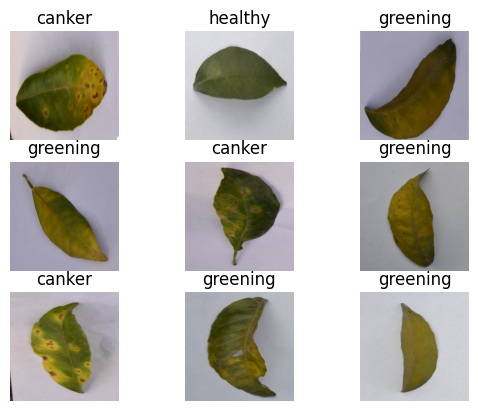

In [5]:
import matplotlib.pyplot as plt

i = 0
for image, label in dataset["train"].take(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(info.features["label"].names[label])
    plt.axis("off")
    i += 1

plt.show()

# Train Test Split

## Train Set

In [6]:
train_set = tfds.load(
    "citrus_leaves",
    split="train[20%:]",
    as_supervised=True
)

len(train_set)

340

## Test Set

In [7]:
test_set = tfds.load(
    "citrus_leaves",
    split="train[:20%]",
    as_supervised=True
)

len(test_set)

85

## Spliting Data

## Training Data

In [8]:
x_train_raw = []
y_train_raw = []

for image, label in train_set:
    x_train_raw.append(image.numpy())
    y_train_raw.append(label.numpy())

x_train_raw = np.array(x_train_raw)
y_train_raw = np.array(y_train_raw)

## Testing Data

In [9]:
x_test_raw = []
y_test_raw = []

for image, label in test_set:
    x_test_raw.append(image.numpy())
    y_test_raw.append(label.numpy())

x_test_raw = np.array(x_test_raw)
y_test_raw = np.array(y_test_raw)


## Encoding Label

In [10]:
y_train = tf.keras.utils.to_categorical(y_train_raw, 4) # ada 4 kelas
y_test = tf.keras.utils.to_categorical(y_test_raw, 4)

## Shape Data

In [11]:
print(f"x_train_raw\t: {x_train_raw.shape}\
    \ny_train\t\t: {y_train.shape} \
    \nx_test\t\t: {x_test_raw.shape} \
    \ny_test\t\t: {y_test.shape}")

x_train_raw	: (340, 256, 256, 3)    
y_train		: (340, 4)     
x_test		: (85, 256, 256, 3)     
y_test		: (85, 4)


### Resize shape

In [12]:
# x_train_raw2 = np.resize(x_train_raw, (340, 64, 64))
# x_test_raw2 = np.resize(x_test_raw, (85, 64, 64))

# print(f"x_train\t: {x_train_raw2.shape}\
#     \nx_test\t: {x_test_raw2.shape}")

### Konversi 256x256 menjadi vektor 196608x1

In [13]:
x_train = x_train_raw.reshape(340, 196608)
x_test = x_test_raw.reshape(85, 196608)

print(f"x_train\t: {x_train.shape}\
    \nx_test\t: {x_test.shape}")


x_train	: (340, 196608)    
x_test	: (85, 196608)


### Normalisasi pixel pada gambar

In [14]:
x_train2 = x_train.astype("float32")/255
x_test2 = x_test.astype("float32")/255

# Membuat DNN

In [15]:
model = Sequential([
    Dense(512, activation="relu", input_dim=196608),
    # Dense(256, activation="relu"),
    # Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    # Dense(128, activation="relu"),
    # Dense(64, activation="relu"),
    # Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    # Dense(16, activation="relu"),
    # Dense(8, activation="relu"),
    Dense(4, activation="softmax") # ada 4 kelas
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               100663808 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 100,733,732
Trainable params: 100,733,732
Non-trainable params: 0
_________________________________________________________________


## Optimalisasi Model

In [16]:
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

## Callback

In [17]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("loss") < 0.0005:
            self.model.stop_training = True


cb = myCallBack()

## Fitting Training Model

In [18]:
history = model.fit(
    x_train2, y_train,
    epochs=20,
    batch_size=128,
    verbose=1,
    validation_data=(x_test2, y_test),
    callbacks=cb
)

Epoch 1/20
3/3 [==============================] - 3s 631ms/step - loss: 92.2525 - accuracy: 0.3147 - val_loss: 288.6740 - val_accuracy: 0.4235
Epoch 2/20
3/3 [==============================] - 2s 628ms/step - loss: 153.3732 - accuracy: 0.4324 - val_loss: 105.0939 - val_accuracy: 0.4588
Epoch 3/20
3/3 [==============================] - 2s 541ms/step - loss: 82.3542 - accuracy: 0.4147 - val_loss: 80.3123 - val_accuracy: 0.4235
Epoch 4/20
3/3 [==============================] - 1s 509ms/step - loss: 44.4288 - accuracy: 0.5265 - val_loss: 28.4410 - val_accuracy: 0.4235
Epoch 5/20
3/3 [==============================] - 1s 499ms/step - loss: 36.6492 - accuracy: 0.2529 - val_loss: 19.4826 - val_accuracy: 0.4235
Epoch 6/20
3/3 [==============================] - 2s 541ms/step - loss: 20.9275 - accuracy: 0.4941 - val_loss: 15.2756 - val_accuracy: 0.4588
Epoch 7/20
3/3 [==============================] - 2s 565ms/step - loss: 12.4756 - accuracy: 0.4353 - val_loss: 6.8528 - val_accuracy: 0.4471
Epoc

## Visualisasi Training Loss

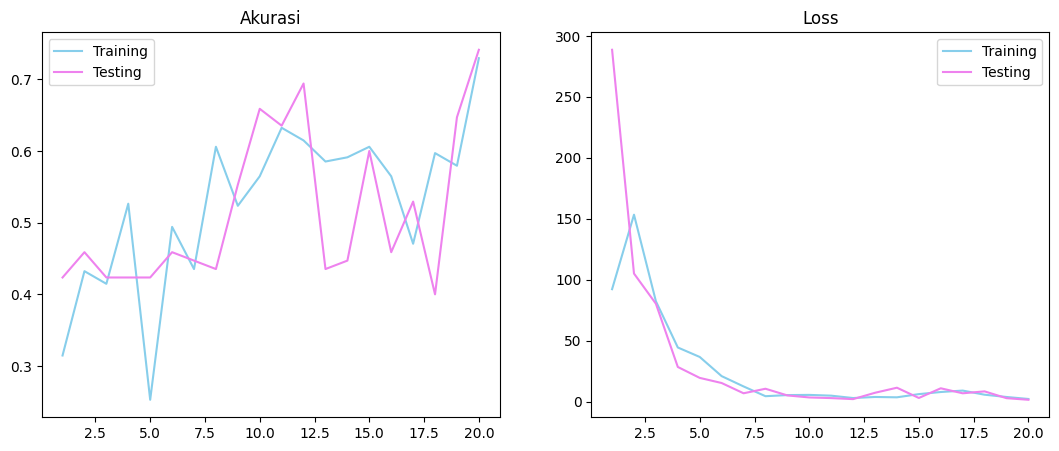

In [19]:
plt.figure(figsize=(13, 5))
epoch = [i for i in range(1, 21)] # ada 10 epochs

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(
    epoch, 
    history.history["accuracy"], 
    label="Training",
    color="skyblue"
)
plt.plot(
    epoch, 
    history.history["val_accuracy"], 
    label="Testing",
    color="violet"
)
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(
    epoch, 
    history.history["loss"], 
    label="Training",
    color="skyblue"
)
plt.plot(
    epoch, 
    history.history["val_loss"], 
    label="Testing",
    color="violet"
)
plt.title("Loss")
plt.legend()

plt.show()


# Evaluate Model

## Data Validation

In [20]:
score = model.evaluate(
    x_test2, y_test,
    verbose=1
)

print(f"TEST LOSS\t: {score[0]}\
    \nTEST ACCURACY\t: {score[1]*100}%")


3/3 [==============================] - 0s 62ms/step - loss: 1.5239 - accuracy: 0.7412
TEST LOSS	: 1.5238949060440063    
TEST ACCURACY	: 74.11764860153198%


## Data Training

In [21]:
score = model.evaluate(
    x_train2, y_train,
    verbose=1
)

print(f"TRAINING LOSS\t\t: {score[0]}\
    \nTRAINING ACCURACY\t: {score[1]*100}%")


11/11 [==============================] - 1s 117ms/step - loss: 1.0212 - accuracy: 0.7735
TRAINING LOSS		: 1.0212229490280151    
TRAINING ACCURACY	: 77.35294103622437%


# Saving Model

In [23]:
model.save("model.h5")